In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

# Eigenvectors and eigenvalues of matrices (assuming real numbers here):

<font size="4">Eigenvectors give the direction of change (they are normalized to length 1). <br>
Eigenvalues give the amplitude of change in that direction. </font> 

In [2]:
#Matrix
C=np.array([[2,1.5],[1.5,2]])
#Eigenvalues and eigenvectors of the matrix (all real in this case)
e,v=np.linalg.eig(C)
print('Eigenvalues are')
print(e)
print('Eigenvectors are')
print(v)

#Original vectors to be transformed by the matrix. They point to the edges of a rectangle around 0.
x1=np.array([1,1])
x2=np.array([-1,1])
x3=np.array([1,-1])
x4=np.array([-1,-1])

#Transformed coordinates after application of matrix
y1=C.dot(x1)
y2=C.dot(x2)
y3=C.dot(x3)
y4=C.dot(x4)


Eigenvalues are
[3.5 0.5]
Eigenvectors are
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


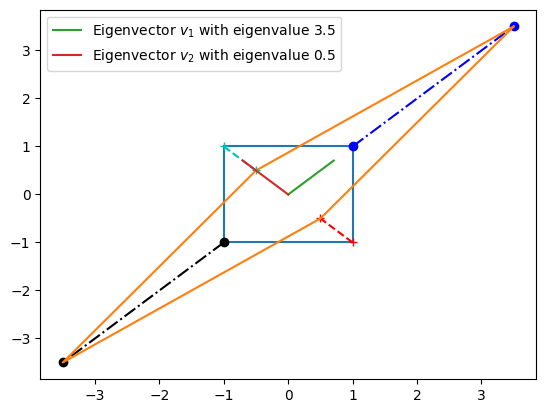

In [21]:
#Plotting of the original square and the transformed points (connected via lines). 
#Also plotted are the two eigenvectors for which the labels give the eigenvalues
plt.plot([-1,1,1,-1,-1], [1,1,-1,-1,1])
plt.plot([x1[0],y1[0]], [x1[1],y1[1]], 'b-.o')
plt.plot([x2[0],y2[0]], [x2[1],y2[1]], 'c--+')
plt.plot([x3[0],y3[0]], [x3[1],y3[1]], 'r--+')
plt.plot([x4[0],y4[0]], [x4[1],y4[1]], 'k-.o')
plt.plot([y1[0],y3[0],y4[0],y2[0],y1[0]], [y1[1],y3[1],y4[1],y2[1],y1[1]])
plt.plot([0,v[0,0]],[0,v[1,0]], label='Eigenvector $v_1$ with eigenvalue 3.5')
plt.plot([0,v[0,1]],[0,v[1,1]], label='Eigenvector $v_2$ with eigenvalue 0.5')
plt.legend()

# Iterative solvers for linear systems of equations:
<font size="4">They are of general form $x_{k+1}=(I-Q^{-1}A)x_k+Q^{-1}b$, where you have to choose an appropriate $Q$ that is easy to invert and close to the matrix A. <br>
Jacobi: $Q$ is diagnonal matrix of $A$. <br>
Gauss-Seidel: $Q$ is lower triangular part of $A$. <br>
Successive over-relaxtion (SOR): Same as GS, but $Q$ is multiplied with a factor $1/w$ for the diagonal elements, where $0<w<2$. </font> 

In [4]:
#Matrix
A=np.array([[2., -1., 0.], [-1., 3., -1.],[0., -1., 2.]])

#Jacobi; inverse of diagonal matrix
Q1=np.diag(1/np.diag(A))

#Gauss-Seidel; inverse of lower triangular matrix
tmp=np.tril(A)
Q2=np.linalg.inv(tmp)

#SOR; inverse of lower triangular matrix of A, 
#where diagonal elements have been multiplied by 1/w, w=1.1 here
w=1.1
tmp=np.tril(A)-np.diag(np.diag(A))+(1/w)*np.diag(np.diag(A))
Q3=np.linalg.inv(tmp)

#First part (I-Q^(-1) A)
It1=(np.identity(3)-np.matmul(Q1,A))
It2=(np.identity(3)-np.matmul(Q2,A))
It3=(np.identity(3)-np.matmul(Q3,A))

#Starting point for iteration; starting error set to sqrt(3), 
#i.e. norm([0,0,0]-[1,1,1])
x=np.array([0.,0.,0.])
x_o=np.array([1.,1.,1.])

#Result vector b
b=np.array([1., 8., -5.])

#Jacobi iteration
i=1
#iterate as long as successive iterations are changing by more than 10^-4
while (np.linalg.norm(x-x_o)>10**-4):
    x_o=x
    x=It1.dot(x)+Q1.dot(b)
    i+=1
print('Solution Jacobi ', x, ' after ',i, ' iterations' )

#Gauss-Seidel iteration
x=np.array([0.,0.,0.])
x_o=np.array([1.,1.,1.])
i=1
#iterate as long as successive iterations are changing by more than 10^-4
while (np.linalg.norm(x-x_o)>10**-4):
    x_o=x
    x=It2.dot(x)+Q2.dot(b)
    i+=1
print('Solution GS ', x, ' after ',i, ' iterations' )

#SOR iteration
x=np.array([0.,0.,0.])
x_o=np.array([1.,1.,1.])
i=1
#iterate as long as successive iterations are changing by more than 10^-4
while (np.linalg.norm(x-x_o)>10**-4):
    x_o=x
    x=It3.dot(x)+Q3.dot(b)
    i+=1
print('Solution SOR ', x, ' after ',i, ' iterations' )

Solution Jacobi  [ 1.9999746   2.99999435 -1.0000254 ]  after  22  iterations
Solution GS  [ 1.9999619  2.9999746 -1.0000127]  after  10  iterations
Solution SOR  [ 2.00000705  3.00000339 -0.99999909]  after  8  iterations
